Operations with `ScalarField` and `VectorField`
======================================

In [1]:
import sys
import os
sys.path.append("/home/smets/codes/far/PHARE/pyphare/")
import pyphare
import matplotlib.pyplot as plt
from pyphare.pharesee.run import Run
from pyphare.core.operators import dot, cross, sqrt, modulus, grad
from pyphare.pharesee.hierarchy import rename
import numpy as np
%matplotlib inline

In [2]:
# run_path = "/DATA/phare/harris/tiny" # Tiny Harris run on kaa
run_path = "/home/smets/codes/far/farMe/Harris/tiny/run"
os.listdir(run_path)

['harris.py',
 'job.sh',
 'checks',
 '.log',
 'ions_density.h5',
 'ions_bulkVelocity.h5',
 'ions_pop_protons_density.h5',
 'ions_pop_protons_flux.h5',
 'EM_E.h5',
 'EM_B.h5',
 'ions_pop_protons_domain.h5',
 '__pycache__',
 'ions_mass_density.h5']

In [3]:
run  = Run(run_path)
time = 0.0

# Operation on `ScalarField`

In [4]:
N = run.GetNi(time)
P = run.GetPe(time)  # , all_primal=True)
type(P)

pyphare.pharesee.hierarchy.ScalarField

In [5]:
for ilvl, lvl in N.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        for name in names:
            pdata = patch.patch_datas[name]
            # print("name       : {}".format(name))
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break

names      : ['value']
id         : p0#0
box        : Box([0, 0],[57, 57])
size [value]  : [63 63]   -   ['primal', 'primal']
 --- 


(<Figure size 432x288 with 2 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

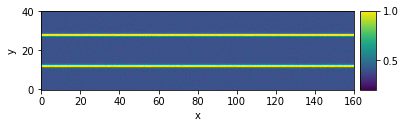

In [6]:
N.plot(qty='value', vmin=0.2, vmax=1.0, cmap='viridis')

## Sum, opposite and difference

In [7]:
a = P+N
b = N-P
c = -P
d = N+0.2
e = P-1

## Product, inverse and division

In [8]:
a = N*P
b = N*2.0
c = 1/N
d = P/2
e = P/N

## Square root

In [9]:
a = sqrt(N)

# Operation on `VectorField`

In [10]:
V = run.GetVi(time) ; print(type(V))
B = run.GetB(time, all_primal=False) ; print(type(B))
B = run.GetB(time) ; print(type(B))
E = run.GetE(time, all_primal=True)

<class 'pyphare.pharesee.hierarchy.VectorField'>
<class 'pyphare.pharesee.hierarchy.PatchHierarchy'>
<class 'pyphare.pharesee.hierarchy.VectorField'>


In [11]:
B.get_names()

['x', 'y', 'z']

In [12]:
B.x

In [13]:
for ilvl, lvl in B.levels(time).items():
    for patch in lvl.patches:
        names = list(patch.patch_datas.keys())
        print('names      : {}'.format(names))
        print("id         : {}".format(patch.id))
        print("box        : {}".format(patch.patch_datas[list(patch.patch_datas.keys())[0]].box))
        for name in names:
            pdata = patch.patch_datas[name]
            # print("name       : {}".format(name))
            print("size [{}]  : {}   -   {}".format(name, pdata.size, pdata.centerings))
        print(" --- ")
        break

names      : ['x', 'y', 'z']
id         : p0#0
box        : Box([0, 0],[57, 57])
size [x]  : [63 63]   -   ['primal', 'primal']
size [y]  : [63 63]   -   ['primal', 'primal']
size [z]  : [63 63]   -   ['primal', 'primal']
 --- 


## Operation which produce a `ScalarField`

In [14]:
a = dot(B, B) ; print(type(a))
b = modulus(B) ; print(type(b))

<class 'pyphare.pharesee.hierarchy.ScalarField'>
<class 'pyphare.pharesee.hierarchy.ScalarField'>


## Sum, opposite and difference

In [15]:
a = V+B
b = B-V
c = -B

(<Figure size 432x288 with 2 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

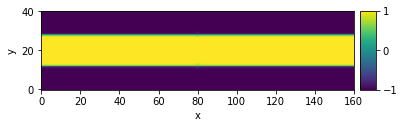

In [16]:
B.plot(qty='x',
       # vmin=-1.2,
       # vmax=1.2,
       cmap='viridis')

(<Figure size 432x288 with 2 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

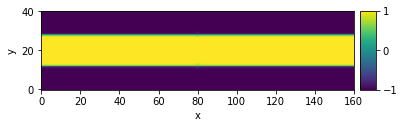

In [17]:
B.x.plot(cmap='viridis')

(<Figure size 432x288 with 2 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

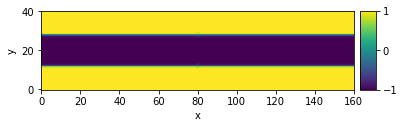

In [18]:
c.plot(qty='x',
       # vmin=-1.2,
       # vmax=1.2,
       cmap='viridis')

## Multiplication and division

In [19]:
a = 2*B
b = B*2
c = B/10

(<Figure size 432x288 with 2 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

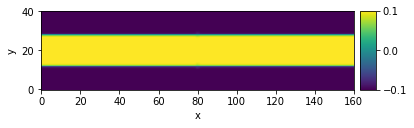

In [20]:
c.plot(qty='x',
       # vmin=-1.2,
       # vmax=1.2,
       cmap='viridis')

## Operation on `ScalarField` producing a `Vectorfield`

In [21]:
P = run.GetPe(time, all_primal=True)
a = grad(P) ; print(type(a))

<class 'pyphare.pharesee.hierarchy.VectorField'>


## Operation on both `ScalarField` and `Vectorfield`

In [22]:
N = run.GetNi(time)
a = grad(P)/N ; print(type(a))
b = B/(N*10)
(10*B).quantities()

<class 'pyphare.pharesee.hierarchy.VectorField'>


['x', 'y', 'z']

## Operation on `VectorField` producing a `VectorField`

In [23]:
a = cross(E, B)

(<Figure size 432x288 with 2 Axes>, <AxesSubplot: xlabel='x', ylabel='y'>)

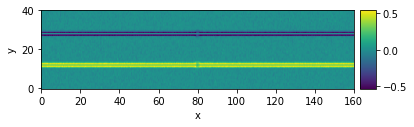

In [25]:
a.plot(qty='z', cmap='viridis')